## Visualization of Simulation Results

### Results for chosen alpha and simulation no. 

In [1]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline

plotter = DiffusionPlotter(dataset_path='../data/final_simulation_dataset.nc')
plotter.show_widgets()

Output()

<xarray.Dataset> Size: 808MB
Dimensions:          (alpha: 100, simulation: 100, t0: 101, steps: 50)
Coordinates:
  * simulation       (simulation) int64 800B 1 2 3 4 5 6 ... 95 96 97 98 99 100
  * t0               (t0) float64 808B 0.0 0.01 0.02 0.03 ... 0.97 0.98 0.99 1.0
  * steps            (steps) int64 400B 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
  * alpha            (alpha) int64 800B 1 2 3 4 5 6 7 ... 94 95 96 97 98 99 100
Data variables:
    hysteresis_gaps  (alpha, simulation) float64 80kB ...
    inflist_asc      (alpha, simulation, t0, steps) float64 404MB ...
    inflist_desc     (alpha, simulation, t0, steps) float64 404MB ...
Attributes:
    n_simulations:  100
    iterations:     50
    hys_threshold:  50
    network_type:   connected_watts_strogatz

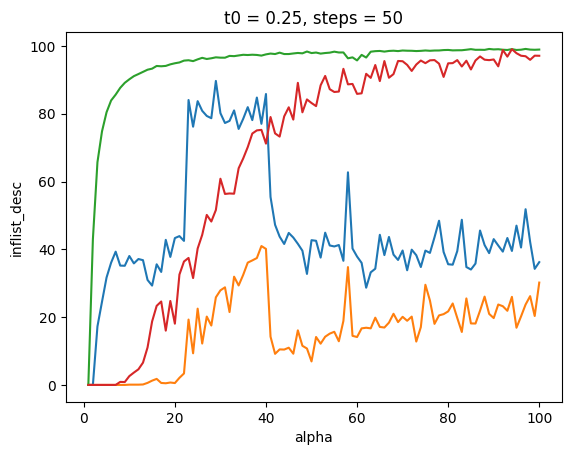

In [1]:
import xarray as xr

ds = xr.open_dataset('../data/final_simulation_dataset.nc')

ds["inflist_asc"].isel(steps=-1, t0=26).mean(dim="simulation").plot(x="alpha")
ds["inflist_desc"].isel(steps=-1, t0=26).mean(dim="simulation").plot(x="alpha")

ds["inflist_asc"].isel(steps=-1, t0=25).mean(dim="simulation").plot(x="alpha")
ds["inflist_desc"].isel(steps=-1, t0=25).mean(dim="simulation").plot(x="alpha")

ds

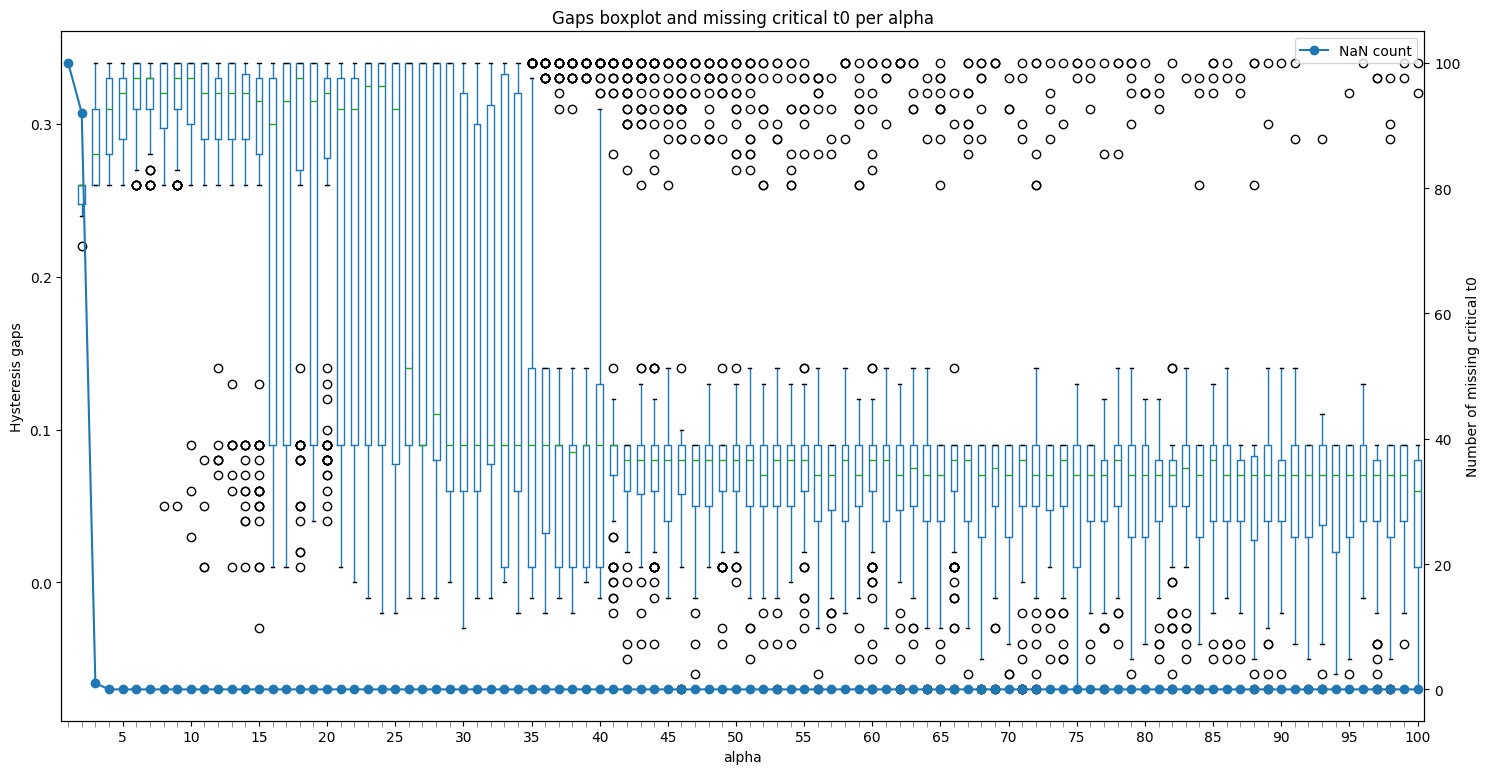

In [3]:
plotter.plot_hysteresis_gaps_with_nan_count()